### Simple Harmonic Oscillator  ###

Started by working out how acceleration could be calculated:

$$F = -kx$$
$$F = ma$$
$$ma = -kx$$
$$a = \frac{-kx}{m}$$

F = force, m = mass, x = position, k = spring constant, a = acceleration

**Position at the next step:**

*I used the formula for average velocity to work this out*
$$x_1 = x_0 + v_0\Delta t$$

**Velocity at the next step:**

*I used the formula for average acceleration to work this out*
$$v_1 = v_0 + a_0\Delta t$$

### Numerical Solution ###

In [2]:
# set the inital conditions. Maybe could define a function so there can be user input

mass = 1 # mass of the object
k = 100 # spring constant
dt = 0.01 # time step
Int_time = 0 # initial time
Int_pos = 0.1 # initial position, 0 taken as equilibrium position
Int_vel = 0 # initial velocity
Accel = -(k * Int_pos)/mass # this is the formula I have written above
End_time = 1 # need to specify end point to stop the calculation

print ['Time', 'Position', 'Velocity', 'Acceleration']
print [Int_time, Int_pos, Int_vel, Accel]
vel_trj = [Int_vel]
pos_trj = [Int_pos]
time_trj = [Int_time]
Accel_trj = [Accel]
while Int_time < End_time:
    time = Int_time + dt # works out the next time
    position = Int_pos + (Int_vel * dt) # position at the next time
    velocity = Int_vel + (Accel * dt) # velocity at the next time
    
    Int_time = round(time,4) # rounded as without this values were being formed with many decimal places,
    # this led to some of the final values where Int_time = End_time not being printed.
    # this can be a problem if smaller timesteps are used as it will round to 0
    Int_pos = position # here the 'new' values are set as the initial ones to carry on the calculation
    Int_vel = velocity
    Accel = -(k * Int_pos)/mass

    if Int_time == End_time:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        print [round(Int_time,4), round(Int_pos,4), round(Int_vel,4), round(Accel,4)]
        print "End"
    else:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        print [round(Int_time,4), round(Int_pos,4), round(Int_vel,4), round(Accel,4)]

['Time', 'Position', 'Velocity', 'Acceleration']
[0, 0.1, 0, -10.0]
[0.01, 0.1, -0.1, -10.0]
[0.02, 0.099, -0.2, -9.9]
[0.03, 0.097, -0.299, -9.7]
[0.04, 0.094, -0.396, -9.401]
[0.05, 0.09, -0.49, -9.005]
[0.06, 0.0851, -0.5801, -8.515]
[0.07, 0.0793, -0.6652, -7.9349]
[0.08, 0.0727, -0.7446, -7.2697]
[0.09, 0.0653, -0.8173, -6.5252]
[0.1, 0.0571, -0.8825, -5.7079]
[0.11, 0.0483, -0.9396, -4.8254]
[0.12, 0.0389, -0.9878, -3.8858]
[0.13, 0.029, -1.0267, -2.898]
[0.14, 0.0187, -1.0557, -1.8713]
[0.15, 0.0082, -1.0744, -0.8156]
[0.16, -0.0026, -1.0825, 0.2588]
[0.17, -0.0134, -1.08, 1.3413]
[0.18, -0.0242, -1.0665, 2.4213]
[0.19, -0.0349, -1.0423, 3.4879]
[0.2, -0.0453, -1.0075, 4.5302]
[0.21, -0.0554, -0.9622, 5.5376]
[0.22, -0.065, -0.9068, 6.4998]
[0.23, -0.0741, -0.8418, 7.4066]
[0.24, -0.0825, -0.7677, 8.2483]
[0.25, -0.0902, -0.6852, 9.0161]
[0.26, -0.097, -0.5951, 9.7013]
[0.27, -0.103, -0.4981, 10.2964]
[0.28, -0.1079, -0.3951, 10.7944]
[0.29, -0.1119, -0.2871, 11.1895]
[0.3, -0.1

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

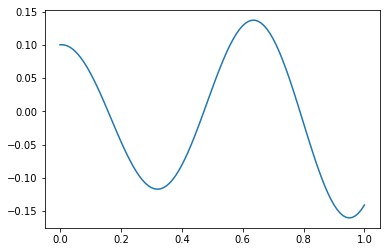

In [4]:
plt.plot(time_trj, pos_trj)

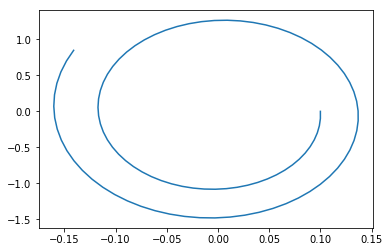

In [5]:
plt.plot(pos_trj, vel_trj)

This uses the Euler method which is quite innacurate, the sine like plot should have a constant amplitude and not one that gets larger over time and the plot of the position and trajectory should form a circle not a spiral. This can be corrected by using the verlet method.

For the verlet:

$$\mathbf{v}(t + \frac{1}{2} \Delta t) = \mathbf{v}(t) + \frac{\Delta t}{2m} \mathbf{F} (t)$$

$$\mathbf{r}(t + \Delta t) = \mathbf{r}(t) + \Delta t \mathbf{v}(t + \frac{1}{2} \Delta t)$$

$$\mathbf{v}(t + \Delta t) = \mathbf{v}(t + \frac{1}{2} \Delta t) + \frac{\Delta t}{2m} \mathbf{F} (t + \Delta t)$$

The function $\frac{\mathbf{F}(t)}{m}$ is equivalent to the acceleration in the Euler method above. $\mathbf{v}(t)$ is the velocity and $\mathbf{r}(t)$ is the position.

In [6]:
mass = 1
k = 100
dt = 0.01
Int_time = 0
Int_pos = 0.1
Int_vel = 0
Accel = -(k * Int_pos)/mass
End_time = 10

print ['Time', 'Position', 'Velocity', 'Acceleration']
print [Int_time, Int_pos, Int_vel, Accel]
vel_trj = [Int_vel]
pos_trj = [Int_pos]
time_trj = [Int_time]
Accel_trj = [Accel]
while Int_time < End_time:
    time = Int_time + dt
    velocity = Int_vel + ((dt/2) * Accel)
    position = Int_pos + dt * velocity 
    Accel = -(k * position)/mass
    velocity = velocity + ((dt/2) * Accel)
    
    Int_time = round(time,4)
    Int_pos = position 
    Int_vel = velocity

    if Int_time == End_time:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        print [round(Int_time,4), round(Int_pos,4), round(Int_vel,4), round(Accel,4)]
        print "End"
    else:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        print [round(Int_time,4), round(Int_pos,4), round(Int_vel,4), round(Accel,4)]

['Time', 'Position', 'Velocity', 'Acceleration']
[0, 0.1, 0, -10.0]
[0.01, 0.0995, -0.0998, -9.95]
[0.02, 0.098, -0.1985, -9.8005]
[0.03, 0.0955, -0.2953, -9.553]
[0.04, 0.0921, -0.3891, -9.21]
[0.05, 0.0877, -0.479, -8.7748]
[0.06, 0.0825, -0.5641, -8.2519]
[0.07, 0.0765, -0.6436, -7.6465]
[0.08, 0.0696, -0.7167, -6.9647]
[0.09, 0.0621, -0.7826, -6.2132]
[0.1, 0.054, -0.8406, -5.3995]
[0.11, 0.0453, -0.8903, -4.5319]
[0.12, 0.0362, -0.9311, -3.6189]
[0.13, 0.0267, -0.9625, -2.6698]
[0.14, 0.0169, -0.9843, -1.6939]
[0.15, 0.007, -0.9963, -0.7011]
[0.16, -0.003, -0.9983, 0.2987]
[0.17, -0.013, -0.9903, 1.2955]
[0.18, -0.0228, -0.9725, 2.2793]
[0.19, -0.0324, -0.9449, 3.2404]
[0.2, -0.0417, -0.9078, 4.1691]
[0.21, -0.0506, -0.8617, 5.056]
[0.22, -0.0589, -0.8069, 5.8924]
[0.23, -0.0667, -0.7441, 6.6699]
[0.24, -0.0738, -0.6739, 7.3807]
[0.25, -0.0802, -0.5969, 8.0177]
[0.26, -0.0857, -0.5139, 8.5745]
[0.27, -0.0905, -0.4258, 9.0455]
[0.28, -0.0943, -0.3335, 9.4261]
[0.29, -0.0971, -0.237

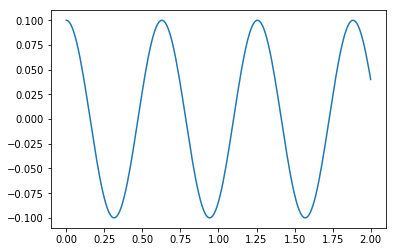

In [21]:
plt.plot(time_trj, pos_trj)

The amplitude of the signal wave no longer starts to increase and remains constant

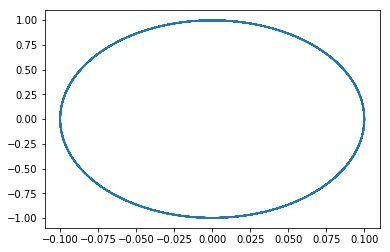

In [8]:
plt.plot(pos_trj, vel_trj)

These graphs show what is expected from a verlet method which suggests the code is doing what it's meant to.

Need to add a calculation for the kinetic and potential energies to find the total energy of the system.

$$U=\frac{1}{2}kx^2$$

$$KE=\frac{1}{2}mv^2$$

$$Total Energy=U+KE=\frac{1}{2}kx^2+\frac{1}{2}mv^2$$

In [9]:
mass = 1
k = 100
dt = 0.01
Int_time = 0
Int_pos = 0.1
Int_vel = 0
Accel = -(k * Int_pos)/mass
End_time = 2
U = 0.5 * k * (Int_pos ** 2)
KE = 0.5 * mass * (Int_vel ** 2)
Tot = U + KE

print ['Time', 'Position', 'Velocity', 'Acceleration', 'Potential', 'Kinetic', 'Total Energy']
print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]

vel_trj = [Int_vel]
pos_trj = [Int_pos]
time_trj = [Int_time]
Accel_trj = [Accel]
U_trj = [U]
KE_trj = [KE]
Tot_trj = [Tot]

while Int_time < End_time:
    time = Int_time + dt
    velocity = Int_vel + ((dt/2) * Accel)
    position = Int_pos + dt * velocity 
    Accel = -(k * position)/mass
    velocity = velocity + ((dt/2) * Accel)
    U = 0.5 * k * (position ** 2)
    KE = 0.5 * mass * (velocity ** 2)
    Tot = U + KE
    
    Int_time = round(time,4)
    Int_pos = position 
    Int_vel = velocity
    
    if Int_time == End_time:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        U_trj.append(U)
        KE_trj.append(KE)
        Tot_trj.append(Tot)
        print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]
        print "End"
    else:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        U_trj.append(U)
        KE_trj.append(KE)
        Tot_trj.append(Tot)
        print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]

['Time', 'Position', 'Velocity', 'Acceleration', 'Potential', 'Kinetic', 'Total Energy']
[0, 0.1, 0, -10.0, 0.5000000000000001, 0.0, 0.5000000000000001]
[0.01, 0.0995, -0.09975, -9.950000000000001, 0.4950125000000001, 0.00497503125, 0.49998753125000006]
[0.02, 0.09800500000000001, -0.19850250000000003, -9.800500000000001, 0.48024900125000003, 0.019701621253125006, 0.49995062250312505]
[0.03, 0.09552995, -0.295269975, -9.552995000000001, 0.456298567350125, 0.04359217906825032, 0.4998907464183753]
[0.04, 0.0920996005, -0.38908475025, -9.209960050000001, 0.42411682061298006, 0.07569347143855244, 0.4998102920515325]
[0.05, 0.087748254995, -0.4790086779975, -8.7748254995, 0.38498781273337707, 0.11472465679845634, 0.4997124695318334]
[0.06, 0.08251942694005, -0.564142518965025, -8.251942694005, 0.3404727911257125, 0.1591283908521018, 0.4996011819778143]
[0.07, 0.0764654046156995, -0.6436349347428998, -7.64654046156995, 0.292347905152132, 0.20713296461074843, 0.4994808697628804]
[0.08, 0.0696

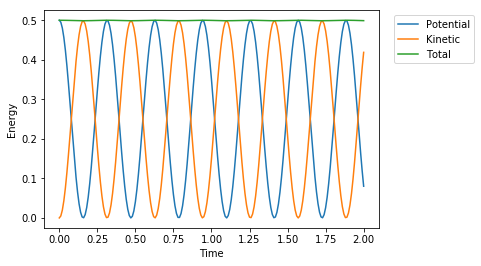

In [10]:
plt.xlabel('Time')
plt.ylabel('Energy')
plt.plot(time_trj, U_trj, label='Potential')
plt.plot(time_trj, KE_trj, label='Kinetic')
plt.plot(time_trj, Tot_trj, label='Total')
plt.legend(bbox_to_anchor=(1.3, 1))

(0, 2)

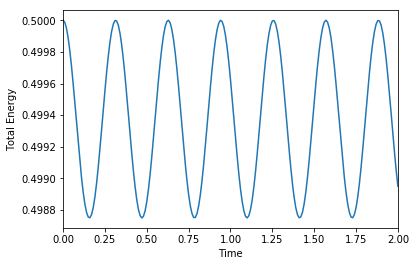

In [11]:
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.plot(time_trj, Tot_trj)
plt.xlim([0,2])

In [12]:
min(Tot_trj)

0.4987501015672198

In [13]:
max(Tot_trj)

0.5000000000000001

In [14]:
max(Tot_trj)-min(Tot_trj)

0.0012498984327803386

The fluctuations in the total energy are much smaller that the fluctuations in the potential and kinetic energies so can be assumed to be constant.

### Analytical Solution ###

**Equations for a Simple Harmonic Oscillator**

$$F = ma$$

$$F = -kx$$

$$a = \frac{d^2 x}{dt^2}$$

$$m\frac{d^2 x}{dt^2} = - kx$$

$$\frac{d^2 x}{dt^2} = -\frac{k}{m}x$$

let $A^2 = \frac{k}{m}$

$$\frac{d^2 x}{dt^2} = -A^2 x$$

Assume $x = e^{\lambda t}$ is a solution $\therefore$ $\frac{d^2 x}{dt^2} = \lambda ^2 e^{\lambda t}$

$$\lambda ^2 e^{\lambda t} = -A^2e^{\lambda t}$$

We can assume that $e^{\lambda t} \neq 0$

$$\lambda ^2 = -A^2$$
$$\lambda = \pm Ai$$

$$x_1 = C_1 e^{Ati}$$
$$x_2 = C_2 e^{-Ati}$$
$$x = C_1e^{Ati} + C_2e^{-Ati}$$

$$e^{i \theta} = \cos{\theta} + i\sin{\theta}$$
$$e^{Ati} = \cos{At} + i\sin{At}$$
$$e^{-Ati} = \cos{-At} + i\sin{-At} = \cos{At} - i\sin{At}$$

$\therefore$ $x = C_1\cos{At} + C_2\cos{At} + i(C_1\sin{At} - C_2\sin{At})$

To get rid of imaginary parts we can set $C_1 = C_2$ or $C_1 \neq C_2$

$C_1 = C_2$

$$x_1 = 2C_1\cos{At}$$

This is the same as:

$$x_1 = C_1\cos{At}$$

$C_1 \neq C_2$

$$x_2 = 2iC_1\sin{At}$$

This can be written as:

$$x_2 = C_2\sin{At}$$

The linear combination is:
$$x = C_1\cos{At} + C_2\sin{At}$$

Initial parameters for the Harmonic Oscillator are:
$$x(0) = x_0$$

$$\dot{x}(0) = v_0$$

$$x(0) = C_1 = x_0$$
$$\dot{x}(0) = AC_2 = v_0$$
$$C_2 = \frac{v_0}{A}$$

$$x(t) = x_0\cos{At} + \frac{v_0}{A}\sin{At}$$

$A^2 = \frac{k}{m}\,\therefore\,\,A = \sqrt{\frac{k}{m}}$

$$x(t) = x_0\cos{\sqrt{\frac{k}{m}} t} + \frac{v_0 \sqrt{m}}{\sqrt{k}}\sin{\sqrt{\frac{k}{m}}t}$$

Velocity is the differential of position with respect to time, so:
$$v(t) - \sqrt{\frac{k}{m}}x_0\sin{\sqrt{\frac{k}{m}}t} + v_0\cos{\sqrt{\frac{k}{m}}t}$$

Acceleration is the differential of velocity with respect to time, so:
$$a(t) = -\left(\frac{k}{m}x_0\cos{\sqrt{\frac{k}{m}}t} + \sqrt{\frac{k}{m}}v_0\sin{\sqrt{\frac{k}{m}}t}\right)$$

$$a(t) = -\frac{k}{m}\left(x_0\cos{\sqrt{\frac{k}{m}}t} + \frac{v_0 \sqrt{m}}{\sqrt{k}}\sin{\sqrt{\frac{k}{m}}t}\right)$$

This is the same as:

$$a(t) = -\frac{k}{m} x(t)$$

$$ma(t) = -kx(t)$$

As $F = ma$ this can be written as:

$$F = -kx(t)$$

### Applying A Fourier Transform to the Harmonic Oscillator ###

In [2]:
import cmath  # mathematical function for complex numbers can be dealt with using this
from math import pi
import matplotlib.pyplot as plt
import numpy as np


def FT(function):
    N = len(function)  # this gives the total points
    F = []
    for k in range(N):
        f = 0.0
        for n in range(N):  # a loop up to N-1
            f += function[n] * cmath.exp(-1j * 2 * pi * k * n / N) # function[n] calls the nth value of the function
        F.append(abs(f))
    return F

def freq(function, dt=0.001):
    N = len(function)
    freq = []
    T = N * dt
    for k in range(N):
        v = k / T
        freq.append(v)
    return freq

In [6]:
mass = 1
k = 100
dt = 0.01
Int_time = 0
Int_pos = 0.1
Int_vel = 0
Accel = -(k * Int_pos)/mass
End_time = 10
U = 0.5 * k * (Int_pos ** 2)
KE = 0.5 * mass * (Int_vel ** 2)
Tot = U + KE
Freq = 1.0 / (2*np.pi) * np.sqrt(k / float(mass))
print 'Frequency =', Freq
print ['Time', 'Position', 'Velocity', 'Acceleration', 'Potential', 'Kinetic', 'Total Energy']
print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]

vel_trj = [Int_vel]
pos_trj = [Int_pos]
time_trj = [Int_time]
Accel_trj = [Accel]
U_trj = [U]
KE_trj = [KE]
Tot_trj = [Tot]

while Int_time < End_time:
    time = Int_time + dt
    velocity = Int_vel + ((dt/2) * Accel)
    position = Int_pos + dt * velocity 
    Accel = -(k * position)/mass
    velocity = velocity + ((dt/2) * Accel)
    U = 0.5 * k * (position ** 2)
    KE = 0.5 * mass * (velocity ** 2)
    Tot = U + KE
    
    Int_time = round(time,4)
    Int_pos = position 
    Int_vel = velocity
    
    if Int_time == End_time:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        U_trj.append(U)
        KE_trj.append(KE)
        Tot_trj.append(Tot)
        print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]
        print "End"
    else:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        U_trj.append(U)
        KE_trj.append(KE)
        Tot_trj.append(Tot)
        print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]

Frequency = 1.59154943092
['Time', 'Position', 'Velocity', 'Acceleration', 'Potential', 'Kinetic', 'Total Energy']
[0, 0.1, 0, -10.0, 0.5000000000000001, 0.0, 0.5000000000000001]
[0.01, 0.0995, -0.09975, -9.950000000000001, 0.4950125000000001, 0.00497503125, 0.49998753125000006]
[0.02, 0.09800500000000001, -0.19850250000000003, -9.800500000000001, 0.48024900125000003, 0.019701621253125006, 0.49995062250312505]
[0.03, 0.09552995, -0.295269975, -9.552995000000001, 0.456298567350125, 0.04359217906825032, 0.4998907464183753]
[0.04, 0.0920996005, -0.38908475025, -9.209960050000001, 0.42411682061298006, 0.07569347143855244, 0.4998102920515325]
[0.05, 0.087748254995, -0.4790086779975, -8.7748254995, 0.38498781273337707, 0.11472465679845634, 0.4997124695318334]
[0.06, 0.08251942694005, -0.564142518965025, -8.251942694005, 0.3404727911257125, 0.1591283908521018, 0.4996011819778143]
[0.07, 0.0764654046156995, -0.6436349347428998, -7.64654046156995, 0.292347905152132, 0.20713296461074843, 0.49948

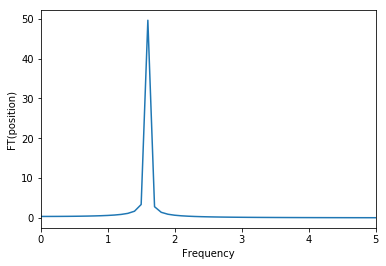

In [4]:
nf = 1 / (2 * 0.01)
plt.plot(freq(pos_trj, 0.01), FT(pos_trj))
plt.xlabel('Frequency')
plt.ylabel('FT(position)')
plt.xlim([0,5])
plt.show()

In [6]:
max(FT(pos_trj))

49.64942326976635

In [9]:
max_y = max(FT(pos_trj))  # finds the maximum y
max_x = freq(pos_trj, 0.01)[FT(pos_trj).index(max_y)]  # finds the x that corresponds to the max y
print max_x, max_y

1.5984015984 49.6494232698


The frequency of the Harmonic Oscillator is 1.598

Note that arrays in numpy do not have an index method so argmax should be used

In [11]:
%matplotlib inline

<function matplotlib.pyplot.show>

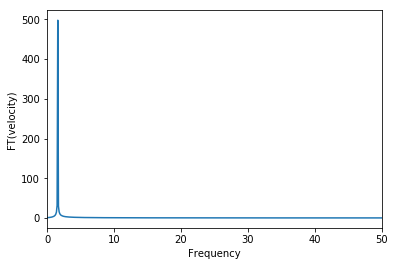

In [12]:
nf = 1 / (2 * 0.01)
plt.plot(freq(vel_trj, 0.01), FT(vel_trj))
plt.xlabel('Frequency')
plt.ylabel('FT(velocity)')
plt.xlim([0,nf])
plt.show

<function matplotlib.pyplot.show>

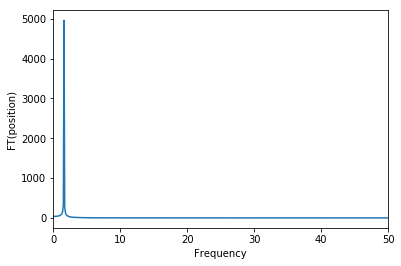

In [13]:
nf = 1 / (2 * 0.01)
plt.plot(freq(Accel_trj, 0.01), FT(Accel_trj))
plt.xlabel('Frequency')
plt.ylabel('FT(position)')
plt.xlim([0,nf])
plt.show

Is there a way to label the peaks using matplotlib?

Increasing the time makes the peaks sharper

### Breaking the Harmonic Oscillator ###

In [3]:
mass = 1
k = 100
dt = 0.1
Int_time = 0
Int_pos = 0.1
Int_vel = 0
Accel = -(k * Int_pos)/mass
End_time = 10
U = 0.5 * k * (Int_pos ** 2)
KE = 0.5 * mass * (Int_vel ** 2)
Tot = U + KE

print ['Time', 'Position', 'Velocity', 'Acceleration', 'Potential', 'Kinetic', 'Total Energy']
print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]

vel_trj = [Int_vel]
pos_trj = [Int_pos]
time_trj = [Int_time]
Accel_trj = [Accel]
U_trj = [U]
KE_trj = [KE]
Tot_trj = [Tot]

while Int_time < End_time:
    time = Int_time + dt
    velocity = Int_vel + ((dt/2) * Accel)
    position = Int_pos + dt * velocity 
    Accel = -(k * position)/mass
    velocity = velocity + ((dt/2) * Accel)
    U = float(0.5 * k * (position ** 2))
    KE = float(0.5 * mass * (velocity ** 2))
    Tot = U + KE
    
    Int_time = round(time,4)
    Int_pos = position 
    Int_vel = velocity
    
    if Int_time == End_time:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        U_trj.append(U)
        KE_trj.append(KE)
        Tot_trj.append(Tot)
        print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]
        print "End"
    else:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        U_trj.append(U)
        KE_trj.append(KE)
        Tot_trj.append(Tot)
        print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]

['Time', 'Position', 'Velocity', 'Acceleration', 'Potential', 'Kinetic', 'Total Energy']
[0, 0.1, 0, -10.0, 0.5000000000000001, 0.0, 0.5000000000000001]
[0.1, 0.05, -0.75, -5.0, 0.12500000000000003, 0.28125, 0.40625]
[0.2, -0.05, -0.75, 5.0, 0.12500000000000003, 0.28125, 0.40625]
[0.3, -0.1, 0.0, 10.0, 0.5000000000000001, 0.0, 0.5000000000000001]
[0.4, -0.05, 0.75, 5.0, 0.12500000000000003, 0.28125, 0.40625]
[0.5, 0.05, 0.75, -5.0, 0.12500000000000003, 0.28125, 0.40625]
[0.6, 0.1, 0.0, -10.0, 0.5000000000000001, 0.0, 0.5000000000000001]
[0.7, 0.05, -0.75, -5.0, 0.12500000000000003, 0.28125, 0.40625]
[0.8, -0.05, -0.75, 5.0, 0.12500000000000003, 0.28125, 0.40625]
[0.9, -0.1, 0.0, 10.0, 0.5000000000000001, 0.0, 0.5000000000000001]
[1.0, -0.05, 0.75, 5.0, 0.12500000000000003, 0.28125, 0.40625]
[1.1, 0.05, 0.75, -5.0, 0.12500000000000003, 0.28125, 0.40625]
[1.2, 0.1, 0.0, -10.0, 0.5000000000000001, 0.0, 0.5000000000000001]
[1.3, 0.05, -0.75, -5.0, 0.12500000000000003, 0.28125, 0.40625]
[1.

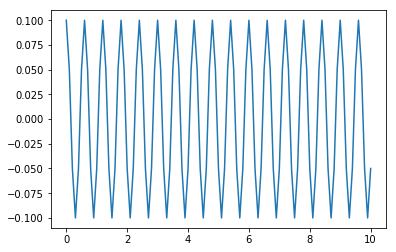

In [4]:
plt.plot(time_trj, pos_trj)

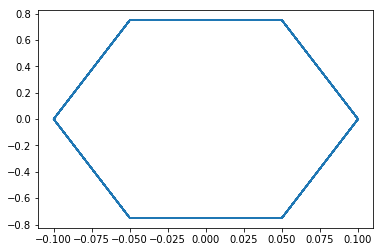

In [5]:
plt.plot(pos_trj, vel_trj)

**Applying the Fourier Transform to this**

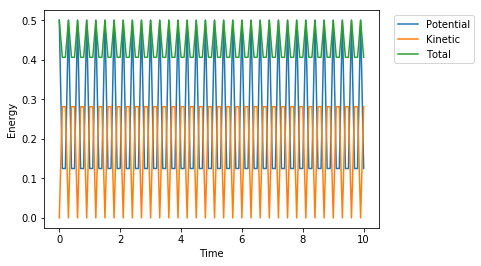

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('Time')
plt.ylabel('Energy')
plt.plot(time_trj, U_trj, label='Potential')
plt.plot(time_trj, KE_trj, label='Kinetic')
plt.plot(time_trj, Tot_trj, label='Total')
plt.legend(bbox_to_anchor=(1.3, 1))

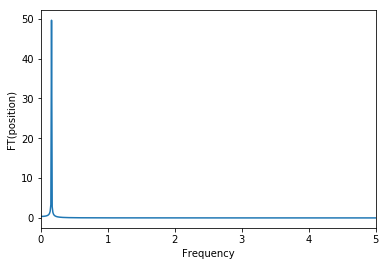

In [14]:
nf = 1 / (2 * 0.1)
plt.plot(freq(pos_trj, 0.1), FT(pos_trj))
plt.xlabel('Frequency')
plt.ylabel('FT(position)')
plt.xlim([0,nf])
plt.show()

In [13]:
mass = 1
k = 100
dt = 0.5
Int_time = 0
Int_pos = 1
Int_vel = 0
Accel = -(k * Int_pos)/mass
End_time = 10
U = 0.5 * k * (Int_pos ** 2)
KE = 0.5 * mass * (Int_vel ** 2)
Tot = U + KE

print ['Time', 'Position', 'Velocity', 'Acceleration', 'Potential', 'Kinetic', 'Total Energy']
print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]

vel_trj = [Int_vel]
pos_trj = [Int_pos]
time_trj = [Int_time]
Accel_trj = [Accel]
U_trj = [U]
KE_trj = [KE]
Tot_trj = [Tot]

while Int_time < End_time:
    time = Int_time + dt
    velocity = Int_vel + ((dt/2) * Accel)
    position = Int_pos + dt * velocity 
    Accel = -(k * position)/mass
    velocity = velocity + ((dt/2) * Accel)
    U = float(0.5 * k * (position ** 2))
    KE = float(0.5 * mass * (velocity ** 2))
    Tot = U + KE
    
    Int_time = round(time,4)
    Int_pos = position 
    Int_vel = velocity
    
    if Int_time == End_time:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        U_trj.append(U)
        KE_trj.append(KE)
        Tot_trj.append(Tot)
        print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]
        print "End"
    else:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        U_trj.append(U)
        KE_trj.append(KE)
        Tot_trj.append(Tot)
        print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]

['Time', 'Position', 'Velocity', 'Acceleration', 'Potential', 'Kinetic', 'Total Energy']
[0, 1, 0, -100, 50.0, 0.0, 50.0]
[0.5, -11.5, 262.5, 1150.0, 6612.5, 34453.125, 41065.625]
[1.0, 263.5, -6037.5, -26350.0, 3471612.5, 18225703.125, 21697315.625]
[1.5, -6049.0, 138600.0, 604900.0, 1829520050.0, 9604980000.0, 11434500050.0]
[2.0, 138863.5, -3181762.5, -13886350.0, 964153581612.5, 5061806303203.125, 6025959884815.625]
[2.5, -3187811.5, 73041937.5, 318781150.0, 508107107976612.5, 2667562316876953.0, 3175669424853565.5]
[3.0, 73180801.0, -1676782800.0, -7318080100.0, 2.6777148175008006e+17, 1.40580027918792e+18, 1.673571760938e+18]
[3.5, -1679970611.5, 38492962462.5, 167997061150.0, 1.4111506277518421e+20, 7.40854079569717e+20, 8.819691423449012e+20]
[4.0, 38566143263.5, -883661353837.5, -3856614326350.0, 7.4367370311040315e+22, 3.904286941329617e+23, 4.64796064444002e+23]
[4.5, -885341324449.0, 20285718175800.0, 88534132444900.0, 3.919146303885547e+25, 2.0575518095399125e+26, 2.449466

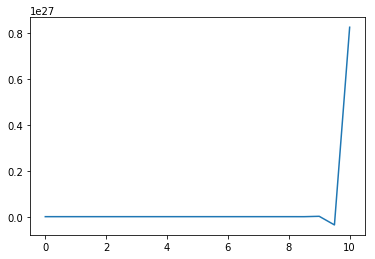

In [14]:
plt.plot(time_trj, pos_trj)

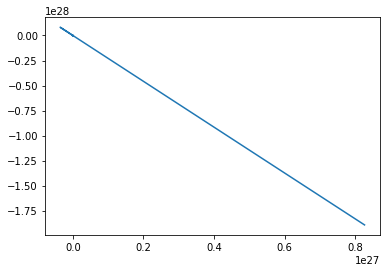

In [15]:
plt.plot(pos_trj, vel_trj)

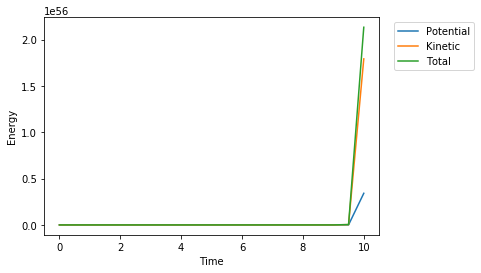

In [16]:
plt.xlabel('Time')
plt.ylabel('Energy')
plt.plot(time_trj, U_trj, label='Potential')
plt.plot(time_trj, KE_trj, label='Kinetic')
plt.plot(time_trj, Tot_trj, label='Total')
plt.legend(bbox_to_anchor=(1.3, 1))

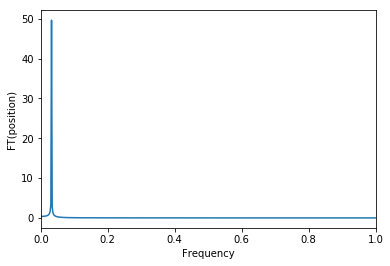

In [15]:
nf = 1 / (2 * 0.5)
plt.plot(freq(pos_trj, 0.5), FT(pos_trj))
plt.xlabel('Frequency')
plt.ylabel('FT(position)')
plt.xlim([0,nf])
plt.show()

In [9]:
mass = 1
k = 100
dt = 1
Int_time = 0
Int_pos = 1
Int_vel = 0
Accel = -(k * Int_pos)/mass
End_time = 10
U = 0.5 * k * (Int_pos ** 2)
KE = 0.5 * mass * (Int_vel ** 2)
Tot = U + KE

print ['Time', 'Position', 'Velocity', 'Acceleration', 'Potential', 'Kinetic', 'Total Energy']
print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]

vel_trj = [Int_vel]
pos_trj = [Int_pos]
time_trj = [Int_time]
Accel_trj = [Accel]
U_trj = [U]
KE_trj = [KE]
Tot_trj = [Tot]

while Int_time < End_time:
    time = Int_time + dt
    velocity = Int_vel + ((dt/2) * Accel)
    position = Int_pos + dt * velocity 
    Accel = -(k * position)/mass
    velocity = velocity + ((dt/2) * Accel)
    U = float(0.5 * k * (position ** 2))
    KE = float(0.5 * mass * (velocity ** 2))
    Tot = U + KE
    
    Int_time = round(time,4)
    Int_pos = position 
    Int_vel = velocity
    
    if Int_time == End_time:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        U_trj.append(U)
        KE_trj.append(KE)
        Tot_trj.append(Tot)
        print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]
        print "End"
    else:
        time_trj.append(time)
        pos_trj.append(position)
        vel_trj.append(velocity)
        Accel_trj.append(Accel)
        U_trj.append(U)
        KE_trj.append(KE)
        Tot_trj.append(Tot)
        print [Int_time, Int_pos, Int_vel, Accel, U, KE, Tot]

['Time', 'Position', 'Velocity', 'Acceleration', 'Potential', 'Kinetic', 'Total Energy']
[0, 1, 0, -100, 50.0, 0.0, 50.0]
[1.0, 1, 0, -100, 50.0, 0.0, 50.0]
[2.0, 1, 0, -100, 50.0, 0.0, 50.0]
[3.0, 1, 0, -100, 50.0, 0.0, 50.0]
[4.0, 1, 0, -100, 50.0, 0.0, 50.0]
[5.0, 1, 0, -100, 50.0, 0.0, 50.0]
[6.0, 1, 0, -100, 50.0, 0.0, 50.0]
[7.0, 1, 0, -100, 50.0, 0.0, 50.0]
[8.0, 1, 0, -100, 50.0, 0.0, 50.0]
[9.0, 1, 0, -100, 50.0, 0.0, 50.0]
[10.0, 1, 0, -100, 50.0, 0.0, 50.0]
End


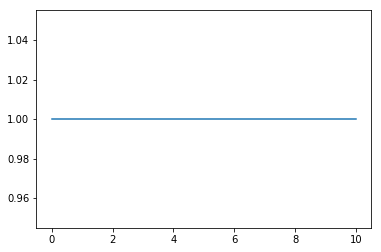

In [10]:
plt.plot(time_trj, pos_trj)

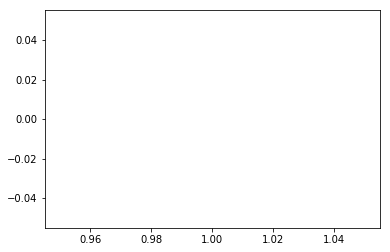

In [11]:
plt.plot(pos_trj, vel_trj)

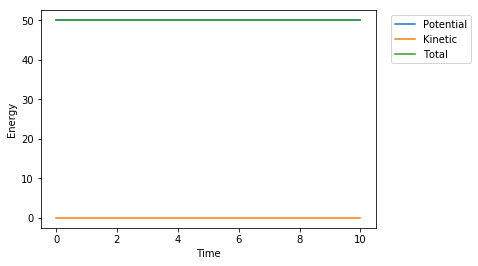

In [12]:
plt.xlabel('Time')
plt.ylabel('Energy')
plt.plot(time_trj, U_trj, label='Potential')
plt.plot(time_trj, KE_trj, label='Kinetic')
plt.plot(time_trj, Tot_trj, label='Total')
plt.legend(bbox_to_anchor=(1.3, 1))

/home/mb17g15/.local/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


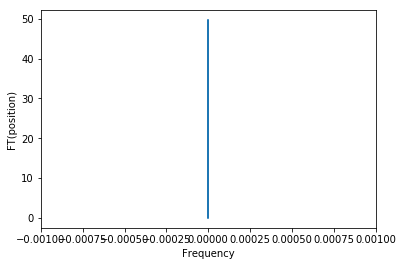

In [16]:
nf = 1 / (2 * 1)
plt.plot(freq(pos_trj, 1), FT(pos_trj))
plt.xlabel('Frequency')
plt.ylabel('FT(position)')
plt.xlim([0,nf])
plt.show()